# Exercise: Neural Network 

In todays exercise you will make a simple feedforward neural network that can replicate the *in silico* color mixer. You will be given quite a lot of code an only have to fill in a few blanks for this notebook to work. However, the purpose of this exercise is not only getting a NN that works but for you to gain some insight into neural networks but experimenting wit varying various aspects. You can vary 

* The noise level in the SilicoColorMixer used to generate data
* The input data
  * Amount of data
  * Different methods to pretreat data
  * Combine data with different pretreatment in one data set
* The Neural Network architecture
  * Number of hidden layers
  * Size of hidden layers
* Evaluation method
* Any other interesting parameter/feature that you might come up with

Start by getting the MLPRegressor from scikit-learn.

In [2]:
try:
    from sklearn.neural_network import MLPRegressor
except:
    !pip3 install scikit-learn --user --upgrade
    from sklearn.neural_network import MLPRegressor

Load in other packages that you (might) need.

In [3]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from plot_pie_charts import make_piechart_plot
from silico_color_mixer import SilicoColorMixer

Now generate som input data. You can generate data in various ways. You can specify color inputs that you would really like to be in the data set or do as done below - generate some random data. We generate a 400 by 4 array with random numbers between 0 and 1. 

In [4]:
x = np.array(np.random.rand(400, 4))

As nice trick when dealing with NN is to normalize your inputs. It is even more true in this case where our true model, the `SilicoColorMixer`, only cares about the ratio of inputs as it normalizes within. Below is a function that normalizes a color list. The `try - except` clause makes the function less sensitive to the format of the input data thus gives some flexibility during other data pretreatments. 

In [5]:
def normalize(color_list):
    sum_list = sum(color_list)
    try:
        norm_list = [1. / sum_list[0] * i for i in color_list]
    except:
        norm_list = [1. / sum_list * i for i in color_list]
    return norm_list

Now pretreat the data. To avoid all data being a mix of all colors, you could remove one color from each data point at random as done below. You can do this two times if you like or come up with your own way of pretreating data to get a different training set.

In [6]:
for idx, line in enumerate(x):
    line[np.random.randint(0,4)] = 0
    x[idx] = normalize(line)
    
print(x)

[[0.         0.74575245 0.1539008  0.10034676]
 [0.31613094 0.40123293 0.         0.28263612]
 [0.45779841 0.         0.24430819 0.2978934 ]
 ...
 [0.32965734 0.32836856 0.         0.3419741 ]
 [0.06534226 0.64608588 0.28857186 0.        ]
 [0.         0.51185114 0.24740503 0.24074383]]


If you want to combine two lists which have undergone different data treatment you can use

In [5]:
z = np.array(np.random.rand(100, 4))
xz = np.concatenate((x, z))
print(len(xz)) # The length of the new array

500


Now, make a list with the colors that are generated by the inputs. Our training data consist of input and corresponding output. What type of learning is this?

In [6]:
rgbs = [] 

Initially try using a color mixer without noise. Once you get the grasp of it, go back to here and add some noise.

In [7]:
data_generator_mixer = SilicoColorMixer(noise=False)
# data_generator_mixer = SilicoColorMixer(noise={'colors': 1, 'volume': 0.02, 'measurement': 2},)

Generate the output.

Note: We use a lot of `for` loops to the point where professional programmers will likely cry out in agony, because they are slow compared to smarter ways of obtaining the same operations. We use them because they are easy to write, read, and understand.

In [8]:
for rand_data in x:
    rgbs.append(data_generator_mixer.run_cuvette(rand_data))

In [9]:
print(len(rgbs))

400


Try to visualize the colors in your training data

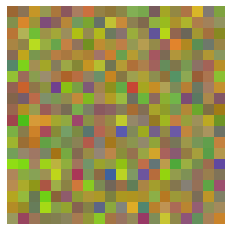

In [10]:
#print(rgbs)
plt.axis('off')
data_array = np.asarray(rgbs).reshape(20, 20, 3)  # Change this as needed, 20 x 20 = 400
plt.imshow(np.asarray(data_array, dtype=np.uint8))
plt.imshow(np.array(data_array, dtype=np.uint8))

See if you can verify that you have a good distribution of inputs.

Change the format of the output from tuple to list, which is what you need to give the neural network (Programmers, look away!)

In [11]:
rgbs_list = []
for color in rgbs:
    rgbs_list.append(list(color))

Now you are ready to train a neural network. We are using the "Regressor" because we want numerical input to return numerical output. Seek out [the online documentation of MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). Figure out what the different keywords mean and what other keywords can be specified.

Below, a neural network is initialized and then trained to your data with the `fit` method. If training takes more than 15 seconds, you have overdone it in some way or another.

In [14]:
mpl = MLPRegressor(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(10,10, 3), random_state=1, max_iter=4000)

mpl.fit(x,rgbs_list)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(10, 10, 3), max_iter=4000,
             random_state=1, solver='lbfgs')

Now, test how well the neural network performs. Use a noiseless color mixer for this purpose.

In [16]:
test_mixer = SilicoColorMixer(noise=False)

You can compare point by point. This can be good sometimes if you have certain points that you know your are particularly interested in. You could also have included such points in the training set

In [17]:
point = [0.25, 0.25, 0., 0.5]
print(mpl.predict([point]))
print(test_mixer.run_cuvette(point))

[[172.33294529 162.41316749  49.32148027]]
(197.75, 183.0, 26.25)


You can do the performance evaluation on a larger data set and more systematically. Generate some data the way you did before. Note, that when you generate data the same way you may inadvertently sample the same subset of data that your used to train the NN model.

In [21]:
x_test = np.array(np.random.rand(100, 4))
for idx, line in enumerate(x_test):
    line[np.random.randint(0,4)] = 0
    x_test[idx] = normalize(line)

A good way to quantify the difference between the test_mixer and the NN is to use your good old "score" function. Copy it in the cell below. Note that the output from the NN will be a list. Your "score" function might treat lists and tuples the same (`input_color1\[0\]` does not care whether `input_color1` is a list or a tuple.

In [22]:
# Your "score function here"

In [23]:
# Teacher
def root_sum_sqr_err(input_color1, input_color2):
    r_color, g_color, b_color = input_color1[0], input_color1[1], input_color1[2]
    r_color2, g_color2, b_color2 = input_color2[0], input_color2[1], input_color2[2]
    return ((r_color-r_color2)**2 +(g_color-g_color2)**2 + (b_color-b_color2)**2)**(0.5)

Calculate the difference scores for the points in the test set and add them to a list. 

In [24]:
scores = []
for x_test_point in x_test:
    nn = mpl.predict([x_test_point])
    silico = test_mixer.run_cuvette(x_test_point)  
    scores.append(your_score_function(nn[0], silico))  # Your score function here

NameError: name 'your_score_function' is not defined

In [25]:
# Teacher
scores = []
for x_test_point in x_test:
    nn = mpl.predict([x_test_point])
    silico = test_mixer.run_cuvette(x_test_point)  
    scores.append(root_sum_sqr_err(nn[0], silico))  # Your score function here

In [26]:
print(scores)

[25.49762113962989, 43.34656650785404, 39.45696974927358, 42.7497371558347, 41.02467002235461, 45.354977107736374, 58.33758097787268, 41.638889939659364, 59.152411549178375, 50.507571720415015, 50.781848740995834, 84.4613608348714, 78.28570659406577, 48.61091252827105, 46.8738995516789, 49.62005314080898, 62.97250210146109, 59.6744594073126, 44.82899490927944, 53.39708290492396, 60.73140340043197, 36.02286807839327, 64.06029518590918, 38.05096822103962, 40.25001396836263, 39.628208921561935, 87.02667996532942, 68.61626763575383, 61.512356008852336, 111.97719305218517, 30.98115218479365, 60.14321729145358, 49.41215404212223, 51.11120735727194, 44.44903679915116, 53.27037410258087, 50.17135264144479, 42.08638828780661, 55.86025450421197, 41.604562965346595, 62.1413971200365, 40.121083007937706, 43.48025995703671, 40.6266961340654, 54.81802417840723, 49.42856420013701, 26.86191632762508, 53.52825894104133, 48.500815853138945, 63.95979749454675, 48.9441072948963, 50.54944183486107, 38.6459

We can reduce this to a few interesting numbers by calculating statistics.

In [28]:
print("Mean: ",np.mean(scores)," Standard deviation: ", np.std(scores))

Mean:  51.52600279816135  Standard deviation:  14.820281883528743


Rinse and repeat.

If you feel like you got this down and are up for an extra challenge, try training multiple NN at a time. They can, but do not have to, use the same training data, architecture, etc. How do the different NN compare against each other? If you do not do this extra challenge, it will NOT count against you.

Once you have a good understanding and have examined how varying different parameters change the result, you are done for today. Take a moment to appreciate yourself for your efforts.